In [1]:
import numpy as np
from functools import partial
import os

import llmize
from llmize import OPRO, HLMEA, HLMSA
import llmize.utils

from dotenv import load_dotenv
load_dotenv()

True

In [2]:

def initialize_tsp(num_cities, seed=42):
    """
    Initializes the TSP with random city coordinates.
    :param num_cities: Number of cities
    :param seed: Random seed for reproducibility
    :return: Distance matrix
    """
    np.random.seed(seed)
    cities = (np.random.rand(num_cities, 2) * 100).astype(int)  # Random cities in 100x100 space with integer coordinates
    
    # Compute distance matrix
    dist_matrix = np.sqrt(((cities[:, np.newaxis] - cities[np.newaxis, :]) ** 2).sum(axis=2))
    return cities, dist_matrix

def objective_function(route, dist_matrix):
    """
    Computes the total travel distance for a given route.
    :param route: A permutation of city indices representing the tour
    :param dist_matrix: Precomputed distance matrix
    :return: Total distance of the route
    """

    # Check if route is valid
    if len(route) != dist_matrix.shape[0]:
        return 1000

    total_distance = sum(dist_matrix[route[i], route[i+1]] for i in range(len(route) - 1))
    total_distance += dist_matrix[route[-1], route[0]]  # Return to starting city
    return total_distance


In [3]:
num_cities = 10
cities, dist_matrix = initialize_tsp(num_cities)
# generate 5 random routes and total distances
routes = [np.random.permutation(num_cities) for _ in range(16)]
total_distances = [objective_function(route, dist_matrix) for route in routes]

print(np.shape(dist_matrix))
print(routes)
print(total_distances)


(10, 10)
[array([1, 5, 4, 8, 0, 7, 6, 3, 2, 9]), array([8, 2, 5, 7, 3, 1, 9, 0, 4, 6]), array([0, 5, 2, 6, 3, 7, 4, 1, 8, 9]), array([4, 8, 1, 3, 0, 5, 2, 9, 7, 6]), array([2, 0, 4, 9, 8, 6, 7, 5, 1, 3]), array([4, 2, 7, 0, 6, 3, 5, 8, 9, 1]), array([5, 2, 7, 3, 0, 8, 9, 6, 1, 4]), array([1, 5, 2, 4, 3, 7, 9, 6, 8, 0]), array([3, 1, 4, 5, 8, 6, 9, 7, 0, 2]), array([2, 4, 5, 1, 7, 0, 9, 3, 8, 6]), array([7, 0, 1, 8, 3, 2, 4, 5, 9, 6]), array([6, 1, 3, 8, 7, 5, 4, 9, 0, 2]), array([4, 7, 8, 3, 5, 1, 0, 2, 9, 6]), array([1, 8, 5, 2, 9, 7, 4, 3, 0, 6]), array([8, 0, 4, 1, 9, 5, 7, 2, 6, 3]), array([0, 2, 1, 9, 7, 6, 3, 5, 4, 8])]
[np.float64(613.5193087234638), np.float64(602.1802669511267), np.float64(576.2101779671258), np.float64(479.824972974584), np.float64(618.7658994262118), np.float64(491.75025098532336), np.float64(419.41428755552556), np.float64(583.6571269951772), np.float64(569.3938426067974), np.float64(669.2406881556949), np.float64(606.7249570169968), np.float64(595.79139888

In [4]:
print(cities)

[[37 95]
 [73 59]
 [15 15]
 [ 5 86]
 [60 70]
 [ 2 96]
 [83 21]
 [18 18]
 [30 52]
 [43 29]]


In [ ]:
with open("tsp_problem.txt", "r") as f:
    problem_text = f.read()

# Initialize the OPRO optimizer
opro = OPRO(problem_text=problem_text, obj_func=partial(objective_function, dist_matrix=dist_matrix),
            llm_model="gemma-3-27b-it", api_key=os.getenv("GEMINI_API_KEY"))

prompt = opro.get_sample_prompt(init_samples=routes, init_scores=total_distances, optimization_type="minimize")
response = opro.get_sample_response(prompt)

llmize.utils.pretty_print(prompt=prompt, response=response)

Prompt:
I want you to help me solve the Traveling Salesman Problem (TSP) for 10 randomly placed cities within a 100x100 coordinate space. The objective is to
find the shortest possible route that visits each city exactly once and returns to the starting point. Your task is to find a trace,
with the shortest possible length, that traverses each point exactly once.

In the TSP, the goal is to minimize the total distance traveled by visiting each city only once and returning to the starting city, creating a closed
loop. The cities are represented as points on a 2D grid, where each city has an x and y coordinate within the 100x100 space.

Below are each city coordinate [x,y] from 0 to 9:
 [37, 95]
 [73, 59]
 [15, 15]
 [ 5, 86]
 [60, 70]
 [ 2, 96]
 [83, 21]
 [18, 18]
 [30, 52]
 [43, 29]

For each pair of cities, the distance between them is calculated using the Euclidean distance formula. The distance between two cities is the square
root of the sum of the squared differences between their 

In [6]:
# Initialize the HLMEA optimizer
hlmea = HLMEA(problem_text=problem_text, obj_func=partial(objective_function, dist_matrix=dist_matrix),
            llm_model="gemma-3-27b-it", api_key=os.getenv("GEMINI_API_KEY"))

prompt = hlmea.get_sample_prompt(init_samples=routes, init_scores=total_distances, batch_size=16, optimization_type="minimize")
response = hlmea.get_sample_response(prompt)

llmize.utils.pretty_print(prompt=prompt, response=response)

Prompt:

You are a hyper-heuristic LLM-driven evolutionary algorithm that generates diverse and optimized solutions for a given problem.
You can adaptively set hyperparameters to enhance solution quality and exploration.

## Problem Description
You need to optimize a given problem by evolving a set of candidate solutions. The objective is to iteratively improve solutions using evolutionary
strategies, ensuring diversity and avoiding premature convergence.

I want you to help me solve the Traveling Salesman Problem (TSP) for 10 randomly placed cities within a 100x100 coordinate space. The objective is to
find the shortest possible route that visits each city exactly once and returns to the starting point. Your task is to find a trace,
with the shortest possible length, that traverses each point exactly once.

In the TSP, the goal is to minimize the total distance traveled by visiting each city only once and returning to the starting city, creating a closed
loop. The cities are represent

In [7]:
# Initialize the HLMSA optimizer
hlmsa = HLMSA(problem_text=problem_text, obj_func=partial(objective_function, dist_matrix=dist_matrix),
            llm_model="gemma-3-27b-it", api_key=os.getenv("GEMINI_API_KEY"))

prompt = hlmsa.get_sample_prompt(init_samples=routes, init_scores=total_distances, batch_size=16, optimization_type="minimize")
response = hlmsa.get_sample_response(prompt)

llmize.utils.pretty_print(prompt=prompt, response=response)

Prompt:

You are a hyper-heuristic LLM-driven optimization algorithm using Simulated Annealing to explore and refine solutions.
You dynamically adapt the cooling rate and perturbation strategies to balance exploration and exploitation.

## Problem Description
You need to optimize a given problem by evolving a set of candidate solutions. The objective is to iteratively improve solutions while maintaining
diversity and avoiding local optima.

I want you to help me solve the Traveling Salesman Problem (TSP) for 10 randomly placed cities within a 100x100 coordinate space. The objective is to
find the shortest possible route that visits each city exactly once and returns to the starting point. Your task is to find a trace,
with the shortest possible length, that traverses each point exactly once.

In the TSP, the goal is to minimize the total distance traveled by visiting each city only once and returning to the starting city, creating a closed
loop. The cities are represented as points on 

In [8]:
from llmize.utils.parsing import parse_pairs, parse_response

pairs, hp = parse_response(response, hp_parse=True)
print(len(pairs))
print(pairs)
print(hp)


16
[[9, 3, 6, 2, 0, 7, 4, 8, 1, 5], [5, 1, 8, 4, 0, 9, 2, 7, 3, 6], [7, 2, 9, 5, 3, 1, 6, 0, 8, 4], [0, 6, 3, 9, 7, 1, 5, 8, 2, 4], [4, 8, 2, 5, 1, 9, 0, 6, 3, 7], [1, 7, 0, 4, 9, 3, 8, 5, 6, 2], [6, 4, 1, 8, 2, 0, 5, 9, 7, 3], [3, 0, 8, 6, 4, 2, 1, 7, 5, 9], [2, 5, 9, 1, 6, 3, 0, 4, 8, 7], [8, 1, 4, 7, 2, 5, 9, 0, 3, 6], [5, 9, 2, 6, 0, 8, 3, 1, 7, 4], [7, 3, 1, 0, 6, 9, 4, 2, 5, 8], [4, 6, 8, 3, 1, 0, 7, 9, 2, 5], [9, 2, 7, 5, 1, 3, 6, 0, 4, 8], [0, 1, 5, 8, 6, 2, 9, 4, 7, 3], [3, 8, 6, 4, 7, 2, 1, 9, 0, 5]]
[0.95]


In [9]:
from llmize.callbacks import EarlyStopping, AdaptTempOnPlateau, OptimalScoreStopping

# Define the early stopping callback
earlystop_callback = EarlyStopping(monitor='best_score', min_delta=1.0, patience=5, verbose=1)

# Define the optimal score stopping callback
optimal_score_callback = OptimalScoreStopping(optimal_score=290.22, tolerance=0.01)

# Define the temperature adaptation callback
adapt_temp_callback = AdaptTempOnPlateau(monitor='best_score', init_temperature=1.0, min_delta=1.0, patience=2, factor=1.1, max_temperature=1.9, verbose=1)

In [10]:
callbacks=[earlystop_callback, adapt_temp_callback, optimal_score_callback]
print(callbacks)

[<llmize.callbacks.early_stopping.EarlyStopping object at 0x148f99b09ac0>, <llmize.callbacks.adapt_temp_on_plateau.AdaptTempOnPlateau object at 0x148f99b09eb0>, <llmize.callbacks.optimal_score_stopping.OptimalScoreStopping object at 0x148f99b09af0>]


In [ ]:
results = opro.minimize(init_samples=routes, init_scores=total_distances, num_steps=250, batch_size=8, callbacks=callbacks)
#results = hlmea.minimize(init_samples=routes, init_scores=total_distances, num_steps=250, batch_size=16, callbacks=callbacks, verbose=1)

#results = hlmsa.minimize(init_samples=routes, init_scores=total_distances, num_steps=250, batch_size=16, callbacks=callbacks, verbose=1)

Running OPRO optimization with 250 steps and batch size 16...
Step 0 - Best Initial Score: 419.414, Average Initial Score: 556.151
WARNING - Number of solutions parsed is greater than batch size. Removing extra solutions.
Step 1 - Current Best Score: 298.402, Average Batch Score: 391.797 - Best Batch Score: 298.402
No improvement in best_score. Patience count: 1/5
Step 2 - Current Best Score: 290.223, Average Batch Score: 290.223 - Best Batch Score: 290.223
WARNING - Optimal score reached at step 2.
WARNING - Optimal score reached at step 2.
Execution time of minimize: 219.123 seconds


In [12]:
print(results)

In [13]:
print(results.best_solution)
print(results.best_score)

[8, 2, 7, 9, 6, 1, 4, 0, 5, 3]
290.2229391972927


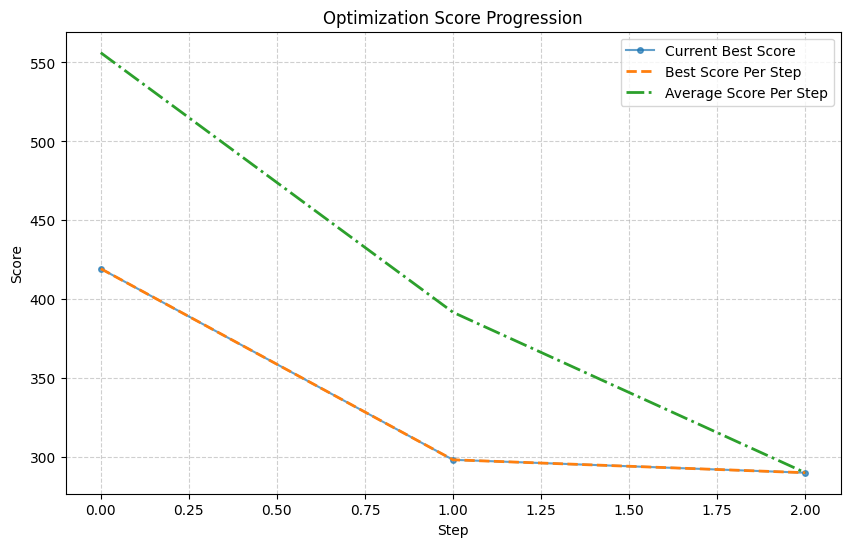

In [14]:
from llmize.utils.plotting import plot_scores

plot_scores(results)

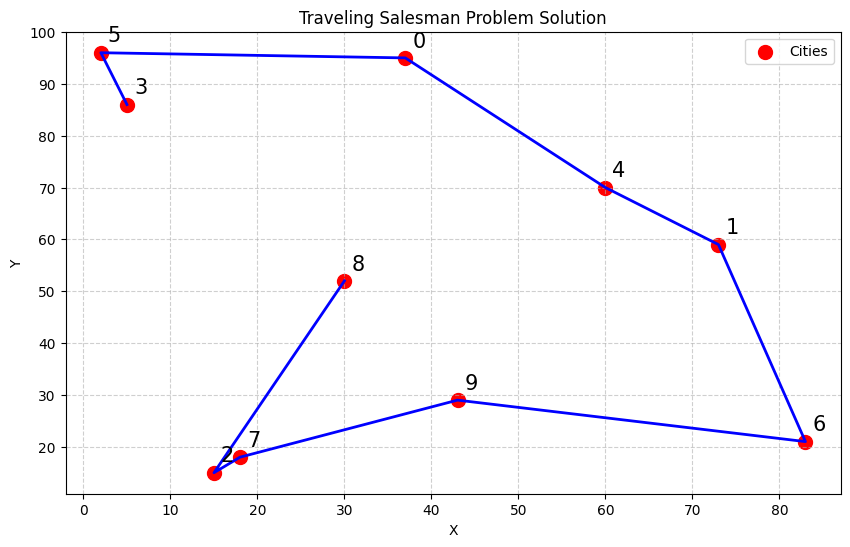

In [15]:
# Plot city coordinates along with traces from best solution
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='r', s=100, label='Cities')

solution = results.best_solution
plt.plot(cities[solution, 0], cities[solution, 1], color='b', linewidth=2)

# Annotate city number a distance to the dots
for i, city in enumerate(cities):
    plt.annotate(str(i), xy=(city[0], city[1]), xytext=(5, 5),fontsize=15, textcoords='offset points', ha='left', va='bottom')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Traveling Salesman Problem Solution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [16]:
print(solution)

[8, 2, 7, 9, 6, 1, 4, 0, 5, 3]


In [19]:
results.best_score_history

[np.float64(419.41428755552556),
 np.float64(298.4019202240617),
 np.float64(290.2229391972927)]